In [1]:
import os
import numpy as np
np.random.seed(1120)
from sklearn.model_selection import train_test_split
import cv2

top_path = 'mask_dataset/' # 안에 chin_mask , full_mask... 로 하위 폴더가 있는 상위 폴더 경로

save_path = 'mask_dataset_final/' # 저장할 경로 (안에 빈 train , test 폴더 먼저 만들어 놓고 실행)

folders = os.listdir(top_path)

for folder in folders:
    
    files = os.listdir(top_path+folder+'/')
    
    image_files = [file for file in files if file.endswith(".png")]
    
    image_1000 = image_files[-1000:]
    
    train,test = train_test_split(image_1000,test_size=0.1,random_state=1120)
    train,validate = train_test_split(train,test_size=(2/9),random_state=1120)
    
    for img in train:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'train/'+folder+'/'+img, original.copy())
        
    for img in validate:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'validate/'+folder+'/'+img, original.copy())
        
    for img in test:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'test/'+folder+'/'+img, original.copy())

In [20]:
train_img_path = "mask_dataset_final/train/"
categories = os.listdir(train_img_path)
num_classes = len(categories)

In [55]:
test_img_path = "mask_dataset_final/test/"
categories2 = os.listdir(test_img_path)
num_classes2 = len(categories2)

In [39]:
X_train = []
Y_train = []
for idx, category in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idx] = 1
    img_path = train_img_path + category + '/'
  
    for dirpath, dirnames, filenames in os.walk(img_path):
        for filename in filenames:
#             print(img_path+filename, label)
            img = cv2.imread(img_path+filename)
            X_train.append(img/255)
            Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [56]:
X_test = []
Y_test = []
for idx, category in enumerate(categories2):
    label2 = [0 for i in range(num_classes2)]
    label2[idx] = 1
    img_path2 = test_img_path + category + '/'
  
    for dirpath, dirnames, filenames in os.walk(img_path2):
        for filename in filenames:
#             print(img_path+filename, label)
            img2 = cv2.imread(img_path2+filename)
            X_test.append(img2/255)
            Y_test.append(label2)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [58]:
X_train.shape

(2800, 90, 120, 3)

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [63]:
model = Sequential()

model.add(Conv2D(64, 3, padding = 'same', activation = 'relu', input_shape = (90, 120, 3)))
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2))

# model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [64]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 90, 120, 64)       1792      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 90, 120, 64)       36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 45, 60, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 45, 60, 128)       73856     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 45, 60, 128)       147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 22, 30, 128)       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 22, 30, 256)      

In [65]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [71]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = 280, epochs = 10, verbose = 1)

Epoch 1/10
10/10 [==============================] - 419s 42s/step - loss: 1.3829 - accuracy: 0.2500 - val_loss: 1.3790 - val_accuracy: 0.4183
Epoch 2/10
10/10 [==============================] - 409s 41s/step - loss: 1.3938 - accuracy: 0.3532 - val_loss: 1.2942 - val_accuracy: 0.6517
Epoch 3/10
10/10 [==============================] - 406s 41s/step - loss: 1.4739 - accuracy: 0.4814 - val_loss: 1.2844 - val_accuracy: 0.4158
Epoch 4/10
10/10 [==============================] - 410s 41s/step - loss: 1.0838 - accuracy: 0.5914 - val_loss: 1.1796 - val_accuracy: 0.6875
Epoch 5/10
10/10 [==============================] - 411s 41s/step - loss: 0.5975 - accuracy: 0.8225 - val_loss: 0.2236 - val_accuracy: 0.9508
Epoch 6/10
10/10 [==============================] - 410s 41s/step - loss: 0.1705 - accuracy: 0.9571 - val_loss: 0.1510 - val_accuracy: 0.9575
Epoch 7/10
10/10 [==============================] - 410s 41s/step - loss: 0.1197 - accuracy: 0.9679 - val_loss: 0.1259 - val_accuracy: 0.9642
Epoch 

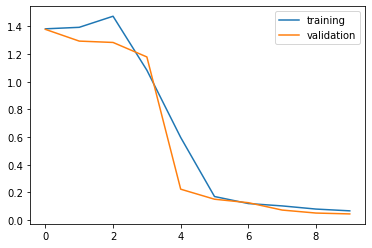

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper right')
plt.show()

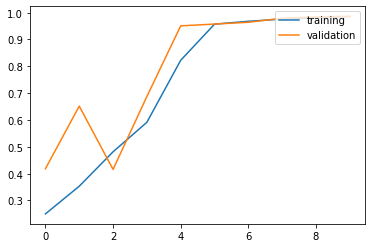

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper right')
plt.show()

In [75]:
model.evaluate(X_test, Y_test)

38/38 [==============================] - 40s 1s/step - loss: 0.0447 - accuracy: 0.9867


[0.04474639892578125, 0.9866666793823242]